<a href="https://colab.research.google.com/github/isaiasgj0002/ejerciciosIA/blob/main/Algoritmos%20Python/tareas/Proyecto_Spark_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#TRABAJO FINAL BIG DATA Y MACHINE LEARNING
#ISAIAS GUZMÁN JORDÁN
#SENATI 5TO SEMESTRE
#ING DE SOFTWARE CON IA

**Prediccion de ventas usando apache spark y Python**<br>
Este modelo de machine learning se ha desarrollado como parte del trabajo final del curso de Big Data y Machine Learning. Su objetivo es predecir las ventas de una heladería en función de sus ventas diarias y las condiciones climáticas del día.<br>
El modelo se basa en una combinación de datos históricos de ventas de la heladería

El primer paso para desarrollar el modelo, es instalar las herramientas necesarias, primero, instalamos Java JDK, luego instalamos la herramienta Apache Spark y por ultimo la libreria de Python Pyspark que nos permitira conectarnos y trabajar con spark usando Python

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://apache.osuosl.org/spark/spark-3.2.0/spark-3.2.0-bin-hadoop3.2.tgz
!tar xf spark-3.2.0-bin-hadoop3.2.tgz

tar: spark-3.2.0-bin-hadoop3.2.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


In [ ]:
!pip install pyspark==3.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.3/281.3 MB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.8/198.8 kB 23.7 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805900 sha256=f67bec8de4a803ad6baf9e7f67324decf86b95e465b6c453ff036d2d82129068
  Stored in directory: /root/.cache/pip/wheels/32/97/d3/8b6d964c8700e4fbb561c71638a92ec55dac9be51eb5fea86d
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


El siguente código crea una instancia de SparkSession llamada spark, que se utilizará para realizar análisis de datos en un clúster de Spark. SparkSession es la entrada a la API de Spark y se utiliza para configurar la aplicación de Spark, crear RDD (Resilient Distributed Datasets) y ejecutar operaciones en RDD. En este caso, la aplicación se nombra "Analisis" y se utiliza el método getOrCreate() para obtener una instancia de SparkSession existente o crear una nueva si no existe.






In [ ]:
# Importar las bibliotecas necesarias
from pyspark.sql import SparkSession

In [ ]:
# Crear una sesión de Spark
spark = SparkSession.builder.appName("Analisis").getOrCreate()

Este código tiene como objetivo leer el archivo CSV ubicado en la carpeta "Colab Notebooks" de Google Drive, utilizando el servicio de Google Drive para montar la unidad en el sistema de archivos del Colaboratory. Luego, utiliza la biblioteca PySpark para leer el archivo CSV con el esquema especificado y carga los datos en un objeto DataFrame. Finalmente, el código muestra los datos del DataFrame en la salida estándar utilizando el método "show()" de PySpark.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks
# Leer el archivo CSV con el esquema especificado
# Leer el archivo CSV con el esquema especificado
df = spark.read.format("csv").option("header", "true").load("/content/drive/My Drive/Colab Notebooks/main_product_sales_weather_view.csv")

# Mostrar el dataframe
df.show()


Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks
+----------+------------------+--------------------+------------+----------+---------------------+----------------------+-----------------+-----------------+
|sales_date|              GTIN|        product_name|weekday_name|month_name|dominant_weather_type|dominant_temp_category|daily_sales_count|daily_sales_value|
+----------+------------------+--------------------+------------+----------+---------------------+----------------------+-----------------+-----------------+
|2019-01-04|GTIN-4060800171900|Pepsi Regular Col...|         FRI|       JAN|                windy|                  cool|               57|            84.93|
|2019-01-04|GTIN-5017726133887|Coca-Cola Soft Dr...|         FRI|       JAN|                windy|                  cool|               80|            119.2|
|2019-01-04|GTIN-5017726170196|Fanta Zero Orange...|         FRI|       JAN|                windy|                  cool|               96|     

En este código, se utiliza la biblioteca matplotlib para generar un histograma de frecuencia a partir de un conjunto de datos almacenados en un DataFrame de Spark.

Primero, se utiliza la función histogram de la biblioteca numpy para calcular los valores de frecuencia y los bordes de los intervalos en los que se agruparán los valores. Luego, se utiliza la función hist de matplotlib para generar el gráfico.

En la gráfica, en el eje X se muestra el valor de los intervalos del histograma y en el eje Y se muestra la frecuencia de los valores en cada intervalo. Los valores de frecuencia se obtienen a partir de la columna "daily_sales_count" del DataFrame.

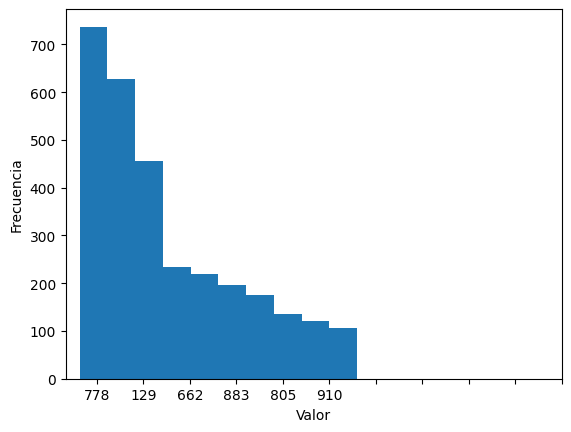

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.functions import col
# Calcular el histograma
hist, bin_edges = np.histogram(df.select(col("daily_sales_count").cast("float")).rdd.flatMap(lambda x: x).collect(), bins=10)
# Graficar el histograma
plt.hist(df.select(col("daily_sales_count")).rdd.flatMap(lambda x: x).collect(), bins=10)
plt.xlabel("Valor")
plt.xticks(bin_edges)
plt.ylabel("Frecuencia")
plt.show()

En este código, se realiza una selección de las columnas "daily_sales_count" y "daily_sales_value" del Dataset. Luego, se convierte este DataFrame de Spark a un DataFrame de Pandas mediante el método "toPandas()". Posteriormente, se realiza una gráfica de dispersión (scatter plot) de los datos utilizando Matplotlib, donde el eje x representa las ventas diarias y el eje y representa el valor de ventas. Finalmente, se muestra la gráfica resultante en la salida. La gráfica permite visualizar la relación entre las ventas diarias y el valor de ventas de la heladería.<br>
En el gráfico generado, los puntos azules representan los datos de ventas diarias y sus respectivos valores de ventas. Cada punto azul en el gráfico representa una combinación de valores de ventas diarias y valores de ventas correspondientes. La posición de cada punto en el eje x (ventas diarias) y el eje y (valor de ventas) indica los valores específicos de cada variable en la combinación.

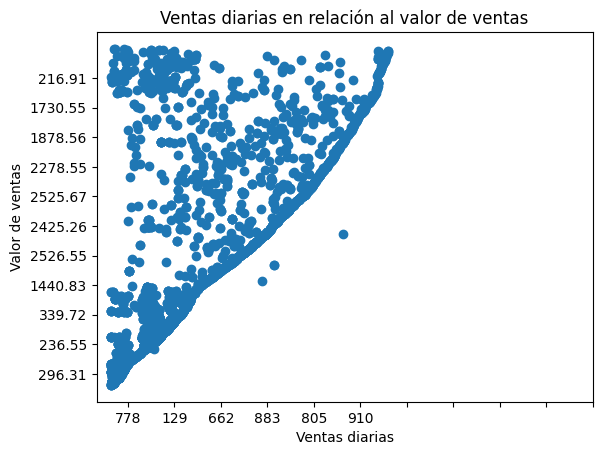

In [ ]:
from pyspark.sql.functions import col
import matplotlib.pyplot as plt
import pandas
# Seleccionar las columnas necesarias
sales = df.select(col("daily_sales_count"), col("daily_sales_value"))

# Convertir los datos de Spark DataFrame a Pandas DataFrame
sales_pd = sales.toPandas()

# Graficar los datos usando Matplotlib
plt.scatter(sales_pd["daily_sales_count"], sales_pd["daily_sales_value"])
plt.title("Ventas diarias en relación al valor de ventas")
plt.xlabel("Ventas diarias")
plt.xticks(bin_edges)
plt.ylabel("Valor de ventas")
plt.yticks(bin_edges)
plt.show()

Este código genera un gráfico de caja (boxplot) que muestra la distribución de las ventas diarias de la heladería según el día de la semana. Para ello, se agrupa el DataFrame por el nombre del día de la semana y se calcula la media y la desviación estándar de las ventas diarias de cada grupo. Luego se filtran las ventas diarias de cada día de la semana y se almacenan en una lista para cada grupo. Finalmente, se usa la función boxplot de Matplotlib para generar el gráfico, que muestra la mediana, el rango intercuartil, los valores mínimo y máximo y los valores atípicos de las ventas diarias para cada día de la semana.

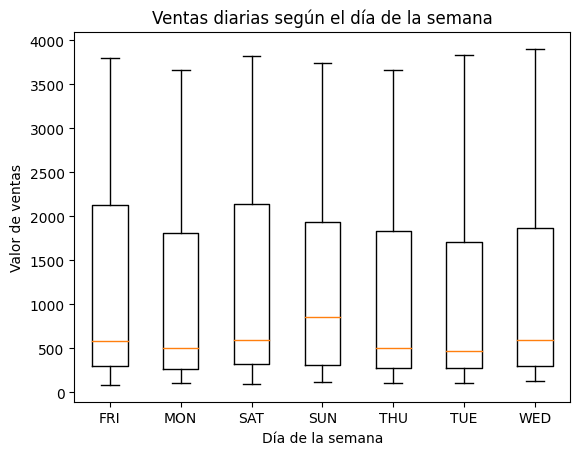

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col

stats = df.groupBy('weekday_name') \
          .agg({'daily_sales_value':'mean', 'daily_sales_value':'stddev'}) \
          .withColumnRenamed('avg(daily_sales_value)', 'mean_daily_sales_value') \
          .withColumnRenamed('stddev_samp(daily_sales_value)', 'stddev_daily_sales_value') \
          .orderBy('weekday_name')

labels = stats.select('weekday_name').rdd.flatMap(lambda x: x).collect()
values = [df.filter(col('weekday_name') == day).select(col('daily_sales_value')).rdd.flatMap(lambda x: x).collect() for day in labels]
values = [list(map(float, day_values)) for day_values in values]

plt.boxplot(values, labels=labels)
plt.title('Ventas diarias según el día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Valor de ventas')
plt.show()


Este código realiza un análisis de las ventas diarias en relación al clima predominante. Primero se agrupan los datos por tipo de clima predominante y se calcula la media y la desviación estándar de las ventas diarias para cada grupo. Luego, se crea una lista con los valores de las ventas diarias para cada tipo de clima y se grafican en un diagrama de caja (boxplot), donde cada caja representa la distribución de las ventas para un tipo de clima particular. El gráfico muestra los valores atípicos (outliers), los cuartiles y la mediana para cada grupo, lo que permite comparar las ventas diarias según el clima predominante.

<ipython-input-28-231c942043fb>:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  boxplot_data = [np.array(df.filter(col('dominant_weather_type') == weather_type).select(col('daily_sales_value')).rdd.flatMap(lambda x: x).collect()).astype(np.float) for weather_type in stats.select('dominant_weather_type').rdd.flatMap(lambda x: x).collect()]


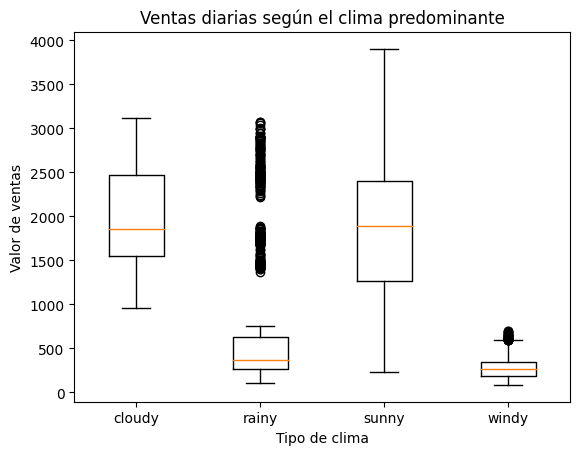

In [ ]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import numpy as np
stats = df.groupBy('dominant_weather_type') \
          .agg({'daily_sales_value':'mean', 'daily_sales_value':'stddev'}) \
          .withColumnRenamed('avg(daily_sales_value)', 'mean_daily_sales_value') \
          .withColumnRenamed('stddev_samp(daily_sales_value)', 'stddev_daily_sales_value') \
          .orderBy('dominant_weather_type')

boxplot_data = [np.array(df.filter(col('dominant_weather_type') == weather_type).select(col('daily_sales_value')).rdd.flatMap(lambda x: x).collect()).astype(np.float) for weather_type in stats.select('dominant_weather_type').rdd.flatMap(lambda x: x).collect()]
labels = [str(x) for x in stats.select('dominant_weather_type').rdd.flatMap(lambda x: x).collect()]
plt.boxplot(boxplot_data, labels=labels)
plt.title('Ventas diarias según el clima predominante')
plt.xlabel('Tipo de clima')
plt.ylabel('Valor de ventas')
plt.show()


Este código importa tres clases de la biblioteca PySpark ML que se utilizan para construir un modelo de regresión basado en árboles de gradiente.

La clase VectorAssembler se utiliza para combinar varias columnas de características en una sola columna de vector. La clase GBTRegressor se utiliza para entrenar un modelo de regresión basado en árboles de gradiente. La clase RegressionEvaluator se utiliza para evaluar el rendimiento del modelo utilizando métricas de regresión como el error cuadrático medio (MSE) o la raíz del error cuadrático medio (RMSE).

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator

Este código crea un nuevo DataFrame llamado df_selected que contiene solo las columnas especificadas en la lista selected_cols. Estas columnas son "sales_date", "weekday_name", "daily_sales_count", "daily_sales_value" y "dominant_weather_type".

In [ ]:
selected_cols = ["sales_date", "weekday_name", "daily_sales_count", "daily_sales_value", "dominant_weather_type"]
df_selected = df.select(selected_cols)

Este código agrega dos columnas nuevas al DataFrame df_selected. La primera columna weekday es el número del día de la semana, donde 1 es el domingo y 7 es el sábado. La segunda columna month es el número del mes correspondiente a la fecha de venta en la columna sales_date.

Luego, las columnas sales_date y weekday_name se eliminan del DataFrame df_selected.

In [ ]:
from pyspark.sql.functions import dayofweek, month

df_selected = df_selected.withColumn("weekday", dayofweek(df_selected["sales_date"]))
df_selected = df_selected.withColumn("month", month(df_selected["sales_date"]))

df_selected = df_selected.drop("sales_date")
df_selected = df_selected.drop("weekday_name")


Este código codifica las variables categóricas en el dataframe df_selected. Primero, se define una lista categorical_cols que contiene los nombres de las columnas categóricas en df_selected. Luego, para cada columna categórica, se crea un objeto StringIndexer para convertir los valores de texto en valores numéricos, y un objeto OneHotEncoder para convertir los valores numéricos en vectores binarios.

El StringIndexer asigna un índice a cada valor único en la columna categórica, y el OneHotEncoder crea un vector binario para cada valor único, en el que todos los elementos son cero excepto uno, que es uno y corresponde al índice del valor único en la columna original. De esta manera, cada valor categórico se transforma en un vector binario que se puede usar en un modelo de aprendizaje automático.

Finalmente, el dataframe df_selected se transforma mediante las operaciones fit y transform de los objetos StringIndexer y OneHotEncoder para incluir las nuevas columnas con los vectores binarios.

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler

# Codificar las variables categóricas
categorical_cols = ["dominant_weather_type"]
for col in categorical_cols:
    string_indexer = StringIndexer(inputCol=col, outputCol=col+"_index")
    encoder = OneHotEncoder(inputCols=[string_indexer.getOutputCol()], outputCols=[col+"_encoded"])
    df_selected = string_indexer.fit(df_selected).transform(df_selected)
    df_selected = encoder.fit(df_selected).transform(df_selected)

Este código realiza varias operaciones de preprocesamiento de datos para preparar el conjunto de datos para el entrenamiento de un modelo de regresión.
<ul>
<li>Convierte las columnas "daily_sales_count" y "daily_sales_value" a tipo numérico.</li>
<li>Escala las variables numéricas "daily_sales_count" y "daily_sales_value" utilizando el método StandardScaler.</li>
<li>Codifica las variables categóricas "dominant_weather_type" utilizando la técnica OneHotEncoder.</li>
<li>Une las variables codificadas y escaladas en un solo vector de características utilizando la función VectorAssembler.</li>
<li>Selecciona las columnas "scaled_features" y "daily_sales_count" para el modelo de regresión.</li>

In [ ]:
from pyspark.sql.functions import col

# Convertir las columnas "daily_sales_count" y "daily_sales_value" a tipo numérico
df_selected = df_selected.withColumn("daily_sales_count", col("daily_sales_count").cast("float"))
df_selected = df_selected.withColumn("daily_sales_value", col("daily_sales_value").cast("float"))

# Escalar las variables numéricas
numeric_cols = ["daily_sales_count", "daily_sales_value"]
assembler = VectorAssembler(inputCols=[col+"_encoded" for col in categorical_cols] + numeric_cols, outputCol="features")
df_selected = assembler.transform(df_selected)

scaler = StandardScaler(inputCol="features", outputCol="scaled_features")
scaler_model = scaler.fit(df_selected)
df_scaled = scaler_model.transform(df_selected)

df_final = df_scaled.select("scaled_features", "daily_sales_count")


Este código divide el dataframe df_final en dos subconjuntos, uno de entrenamiento y otro de prueba, con una relación de 70% y 30%, respectivamente. El 70% se utilizará para entrenar el modelo de machine learning, mientras que el 30% se utilizará para evaluar el rendimiento del modelo entrenado.

In [ ]:
(train_df, test_df) = df_final.randomSplit([0.7, 0.3])

Este código entrena el modelo de regresión de gradient boosting (GBT) utilizando el algoritmo GBTRegressor de la librería ML de PySpark. El modelo se entrena con los datos de entrenamiento train_df, utilizando las variables predictoras escaladas en scaled_features y la variable respuesta en daily_sales_count.

El modelo se configura con los hiperparámetros maxDepth=5, maxBins=32 y maxIter=20, que controlan la profundidad máxima del árbol, el número máximo de divisiones en cada nodo y el número máximo de iteraciones del algoritmo, respectivamente. Además, se establece una semilla aleatoria seed=42 para reproducibilidad.

Una vez entrenado el modelo, se guarda en la variable gbt_model.

In [ ]:
from pyspark.ml.regression import GBTRegressor

gbt = GBTRegressor(featuresCol="scaled_features", labelCol="daily_sales_count", maxDepth=5, maxBins=32, maxIter=20, seed=42)
print("Entrenando el modelo......")
gbt_model = gbt.fit(train_df)
print("Modelo entrenado con exito")

Entrenando el modelo......
Modelo entrenado con exito


Finalmente, este código realiza predicciones utilizando un modelo de regresión de árboles de gradient boosting (GBT) entrenado previamente en los datos de entrenamiento. Las predicciones se realizan en los datos de prueba y se almacenan en el dataframe "predictions".

Los resultados de las predicciones muestran tres columnas: "scaled_features" que representa las características escaladas de cada muestra de prueba, "daily_sales_count" que es el número real de ventas para cada muestra de prueba, y "prediction" que es la predicción del modelo para el número de ventas de cada muestra de prueba.

En la primera muestra de prueba, el modelo predice que el número de ventas será de aproximadamente 566.6, mientras que en la segunda muestra de prueba, el modelo también predice un número de ventas de aproximadamente 566.6, pero en la tercera muestra de prueba, el modelo predice un número de ventas de aproximadamente 594.3.

In [ ]:
# Realizar predicciones con los datos de prueba
predictions = gbt_model.transform(test_df)
print("Ahora hagamos predicciones...")
# Mostrar las predicciones
print("Estas son las predicciones:")
predictions.show()

Ahora hagamos predicciones...
Estas son las predicciones:
+--------------------+-----------------+-----------------+
|     scaled_features|daily_sales_count|       prediction|
+--------------------+-----------------+-----------------+
|(5,[3,4],[1.48385...|            574.0|566.6152469077083|
|(5,[3,4],[1.50711...|            583.0|566.6152469077083|
|(5,[3,4],[1.51228...|            585.0|594.2926685977374|
|(5,[3,4],[1.57949...|            611.0|609.9347860742098|
|(5,[3,4],[1.59500...|            617.0|614.0549159696805|
|(5,[3,4],[1.64671...|            637.0| 646.561694600502|
|(5,[3,4],[1.68807...|            653.0| 646.561694600502|
|(5,[3,4],[1.72943...|            669.0|646.8470571595002|
|(5,[3,4],[1.74494...|            675.0|684.8437479692544|
|(5,[3,4],[1.75528...|            679.0|685.1291105282527|
|(5,[3,4],[1.77079...|            685.0|685.1291105282527|
|(5,[3,4],[1.77338...|            686.0|686.5196046064784|
|(5,[3,4],[1.77338...|            686.0|686.0243529498554